# Diabetes prediction: decision tree

## Notebook set-up

In [1]:
# Python standard library imports
import pickle
from pathlib import Path
from itertools import combinations

# PyPI imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

# Internal imports
import configuration as config
import functions as funcs

## 1. Data loading

### 1.1. Load data from URL

In [ ]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
data_df = pd.read_csv(url)
data_df.drop_duplicates().reset_index(drop=True, inplace=True)

### 1.2. Save a local copy

In [ ]:
# Your code here


### 1.3. Inspect

In [ ]:
# Your code here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. EDA
### 2.1. Data composition

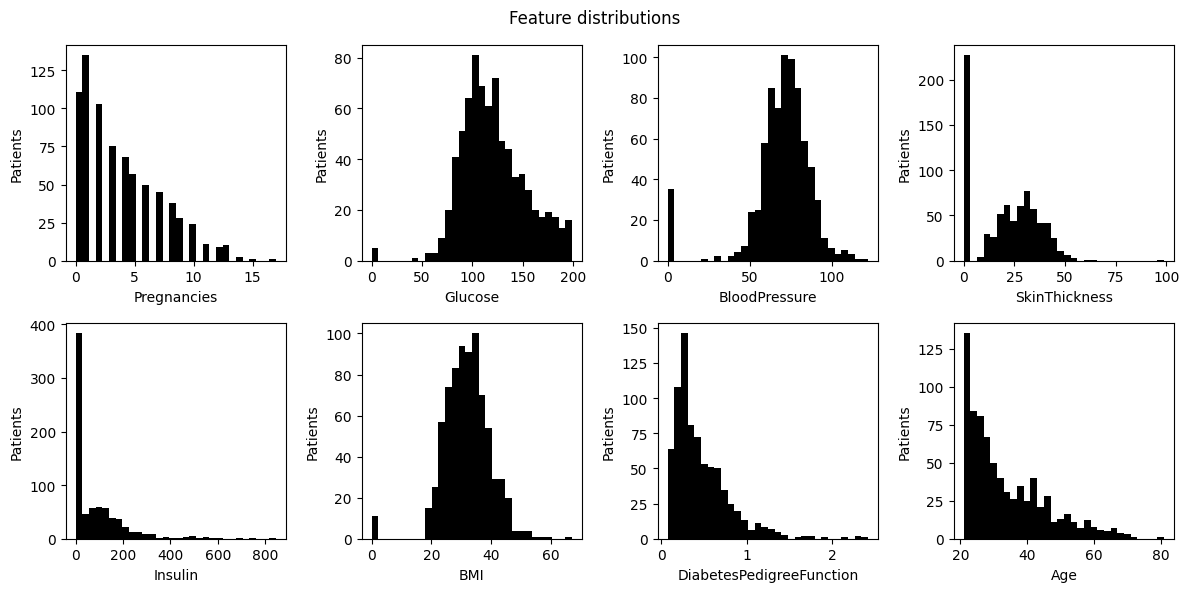

In [ ]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

# Plot feature distributions with histograms

### 2.2. Feature interactions

#### 2.2.1. Feature cross-correlations

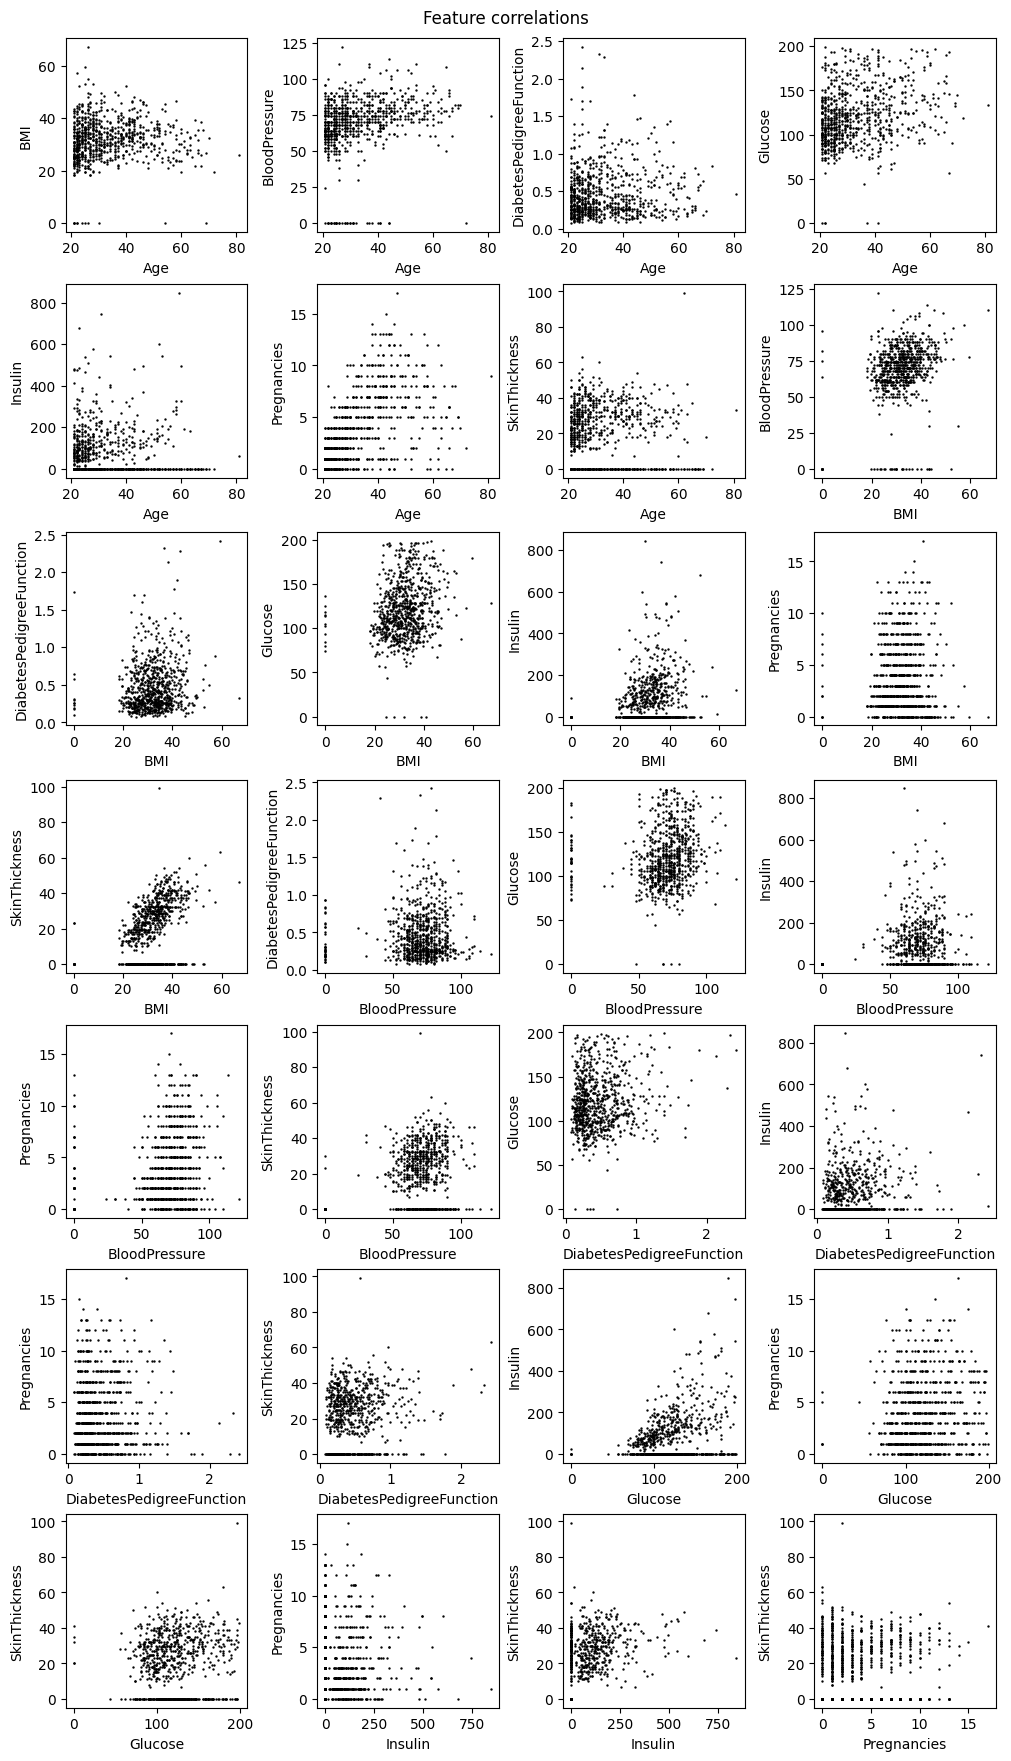

In [ ]:
# Draw scatter plots to show the correlation between each pair of features


#### 2.2.2. Feature-label interactions

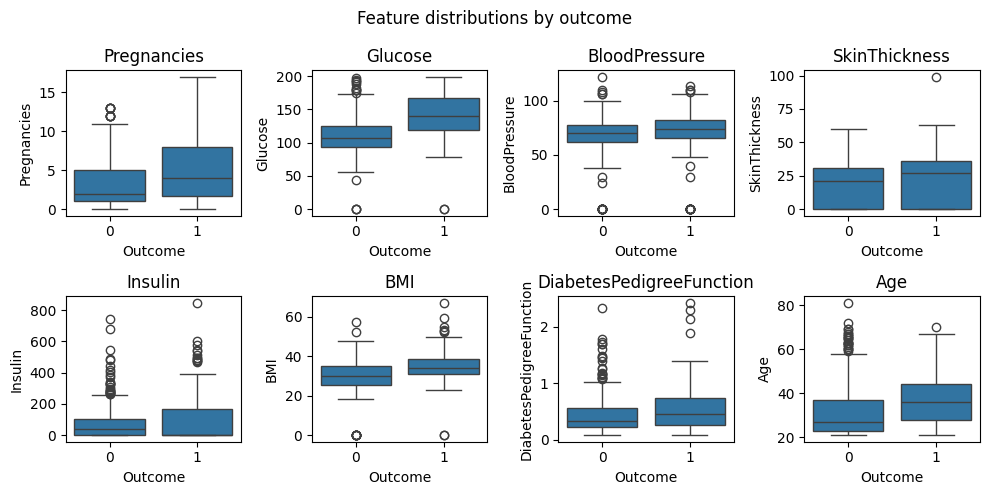

In [ ]:
# Use box plots to show the distribution for each feature in diabetes positive and negative populations


## 3. Data preparation

### 3.1. Test-train split

In [ ]:
# Your code here


### 3.2. Imputation of zeros

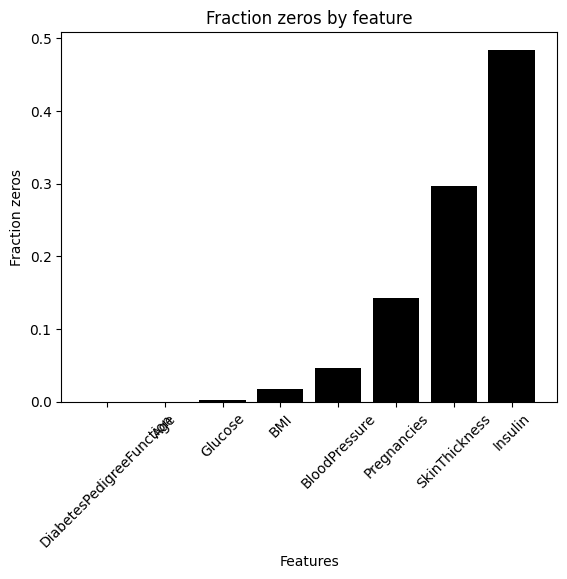

In [ ]:
# Take a close look at zero values in each feature. Is something strange going on?

In [ ]:
# Devise and implement a strategy to fill in zeros with reasonable values


## 4. Model training

### 4.1. Baseline

In [ ]:
# Set a performance baseline


Testing accuracy of constant "0" model: 63.5%


### 4.2. Decision tree classifier

In [ ]:
# Train and evaluate a decision tree


Training accuracy of decision tree model: 100.0%


In [ ]:
# Use cross validation to evaluate the model's performance:
# see: https://scikit-learn.org/stable/modules/cross_validation.html

cross_val_scores = {
    'Model': [],
    'Score': []
}

scores = cross_val_score(
    model,
    training_df.drop('Outcome', axis=1),
    training_df['Outcome'],
    cv=7,
    n_jobs=-1
)

cross_val_scores['Model'].extend(['Baseline']*len(scores))
cross_val_scores['Score'].extend(scores*100)

print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

Cross-validation accuracy: 67.0 +/- 3.0%


## 4. Hyperparameter optimization

### 4.1. Hyperparameter grid search

In [ ]:
# Perform a grid search on some or all of the hyperparameters from the slides


Best hyperparameters:

 ccp_alpha: 0.0
 criterion: gini
 max_depth: 16
 max_features: 0.5
 min_impurity_decrease: 0.001
 min_weight_fraction_leaf: 0.0125
 splitter: best

CPU times: user 20.9 s, sys: 477 ms, total: 21.4 s
Wall time: 5min 15s


### 4.2. Hyperparameter optimization results

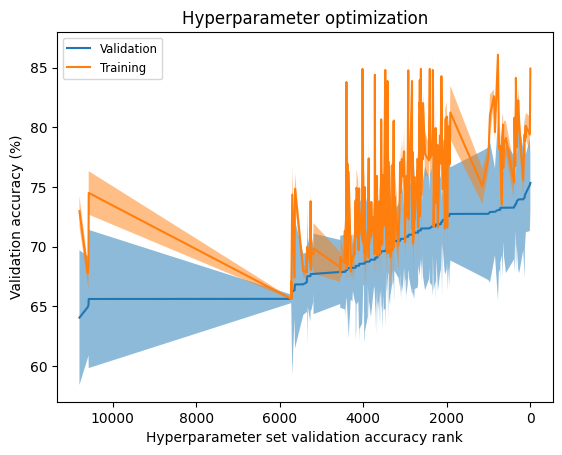

In [ ]:
# Evaluate the results


## 5. Evaluation

### 5.1. Model comparison

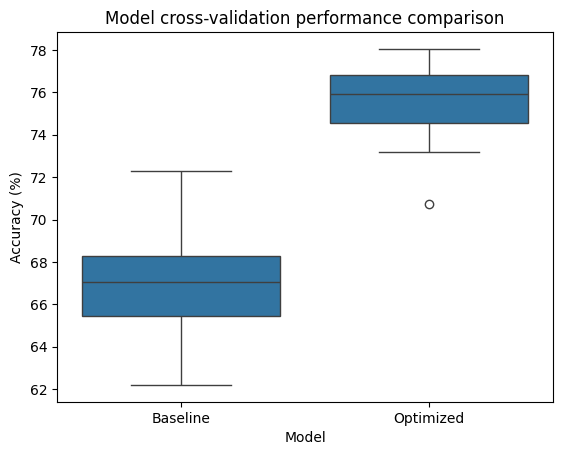

In [ ]:
# Compare the naive to the optimized model


### 5.2. Test set performance

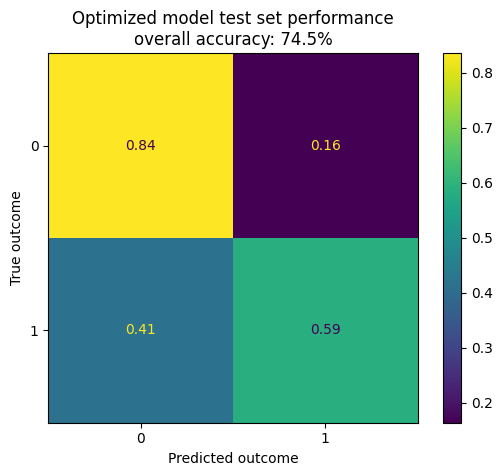

In [ ]:
# Evaluate the model on the test set

## 6. Save

### 6.1. Data

In [22]:
Path('../data/raw').mkdir(exist_ok=True, parents=True)
data_df.to_parquet(config.RAW_DATA_FILE)

Path('../data/processed').mkdir(exist_ok=True, parents=True)
data={
    'training': training_df,
    'testing': testing_df
}

with open(config.DATA_FILE, 'wb') as output_file:
    pickle.dump(data, output_file)

### 6.2. Optimized hyperparameters

In [23]:
Path('../models').mkdir(exist_ok=True, parents=True)

with open(config.DECISION_TREE_HYPERPARAMETERS, 'wb') as output_file:
    pickle.dump(hyperparameters, output_file)

### 6.3. Model

In [24]:
with open(config.DECISION_TREE_MODEL, 'wb') as output_file:
    pickle.dump(model, output_file)